
Training for palindrome length T=5
Using device: cuda


Step     0 | Loss 2.6598 | Accuracy 0.086
Step    10 | Loss 1.7929 | Accuracy 0.289
Step    20 | Loss 1.6852 | Accuracy 0.305
Step    30 | Loss 1.5262 | Accuracy 0.289
Step    40 | Loss 1.5007 | Accuracy 0.375
Step    50 | Loss 1.2321 | Accuracy 0.500
Step    60 | Loss 1.0868 | Accuracy 0.672
Step    70 | Loss 1.0610 | Accuracy 0.609
Step    80 | Loss 0.9605 | Accuracy 0.719
Step    90 | Loss 0.9557 | Accuracy 0.578
Step   100 | Loss 0.8007 | Accuracy 0.719
Step   110 | Loss 0.8084 | Accuracy 0.750
Step   120 | Loss 0.7255 | Accuracy 0.820
Step   130 | Loss 0.9826 | Accuracy 0.414
Step   140 | Loss 0.6720 | Accuracy 0.781
Step   150 | Loss 0.6686 | Accuracy 0.766
Step   160 | Loss 0.5895 | Accuracy 0.938
Step   170 | Loss 0.5592 | Accuracy 0.797
Step   180 | Loss 0.5892 | Accuracy 0.766
Step   190 | Loss 0.4831 | Accuracy 0.969
Step   200 | Loss 0.4486 | Accuracy 0.859
Step   210 | Loss 0.4882 | Accuracy 0.773
Step   220 | Loss 0.4475 | Accuracy 0.867
Step   230 | Loss 0.3881 | Accurac

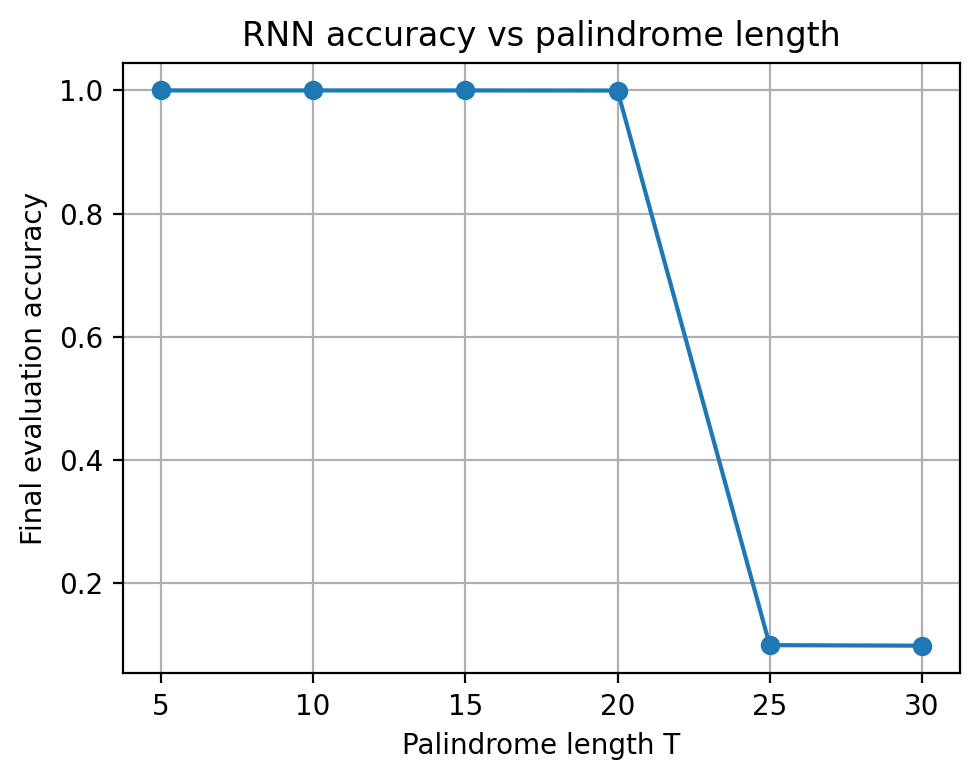

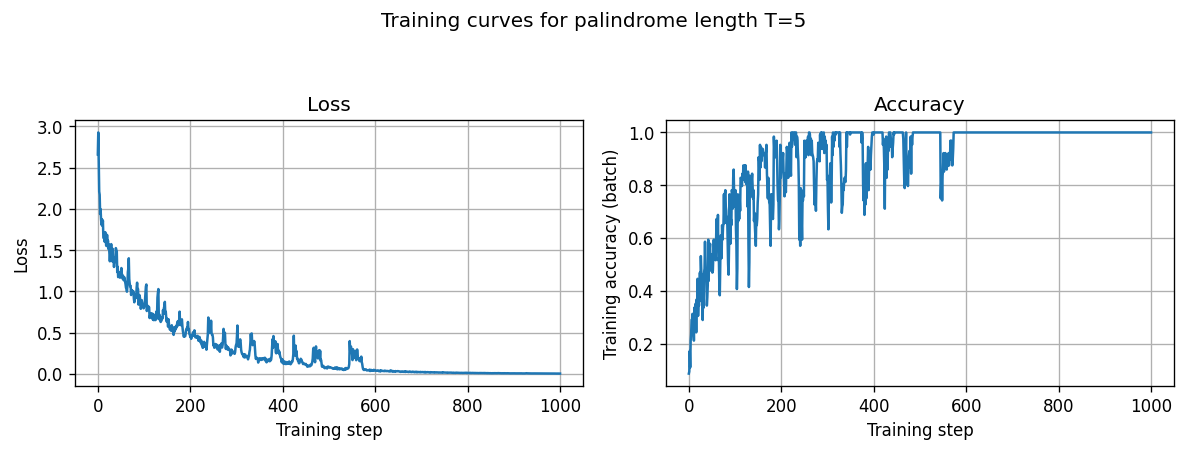

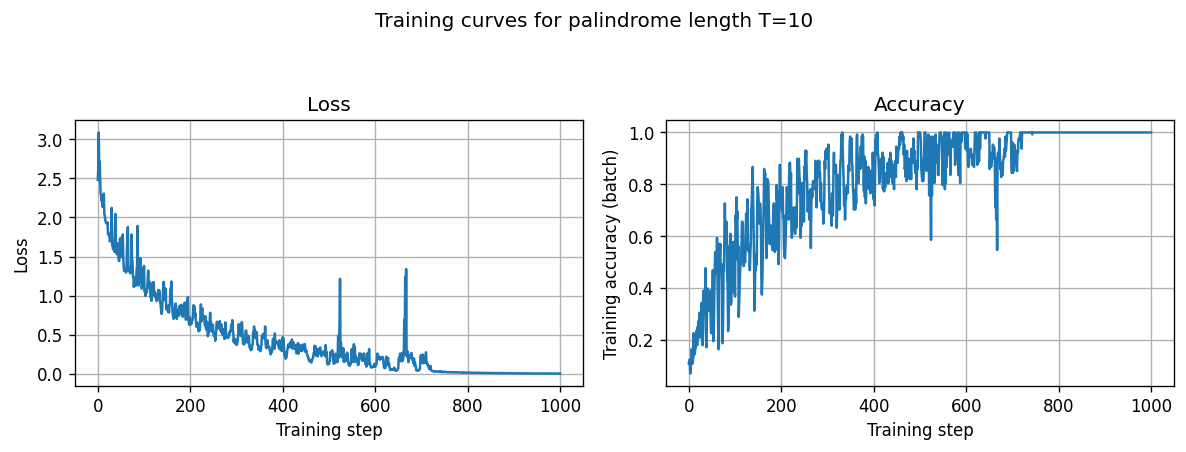

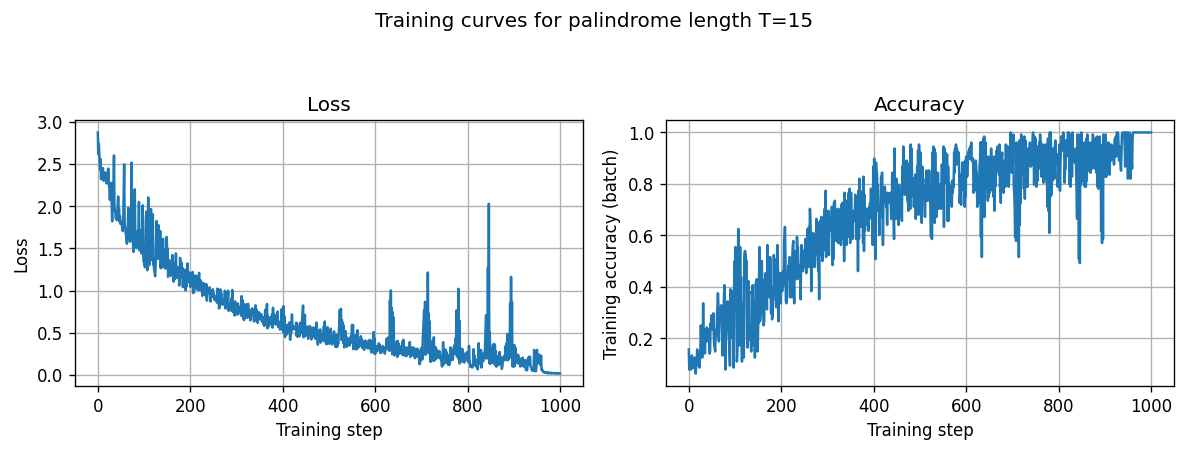

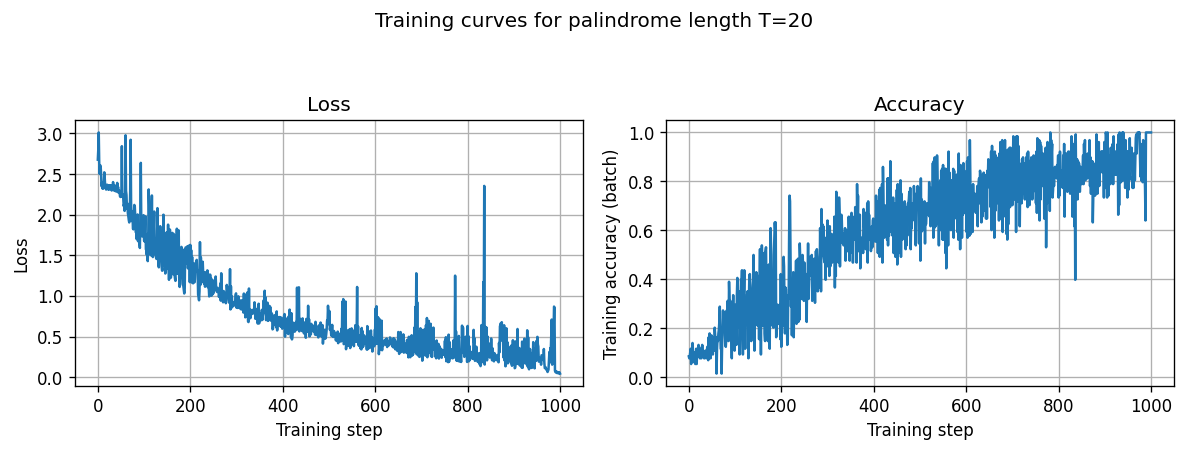

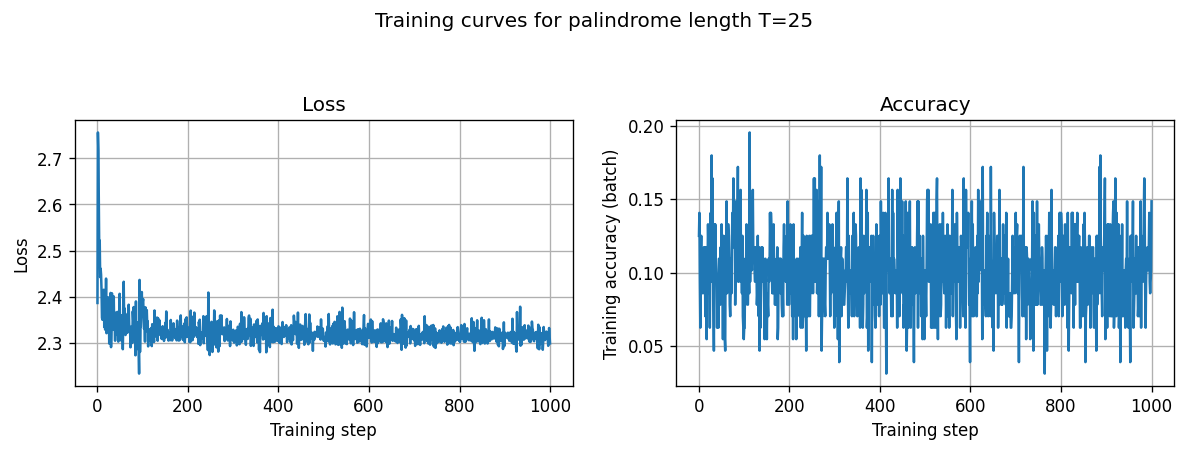

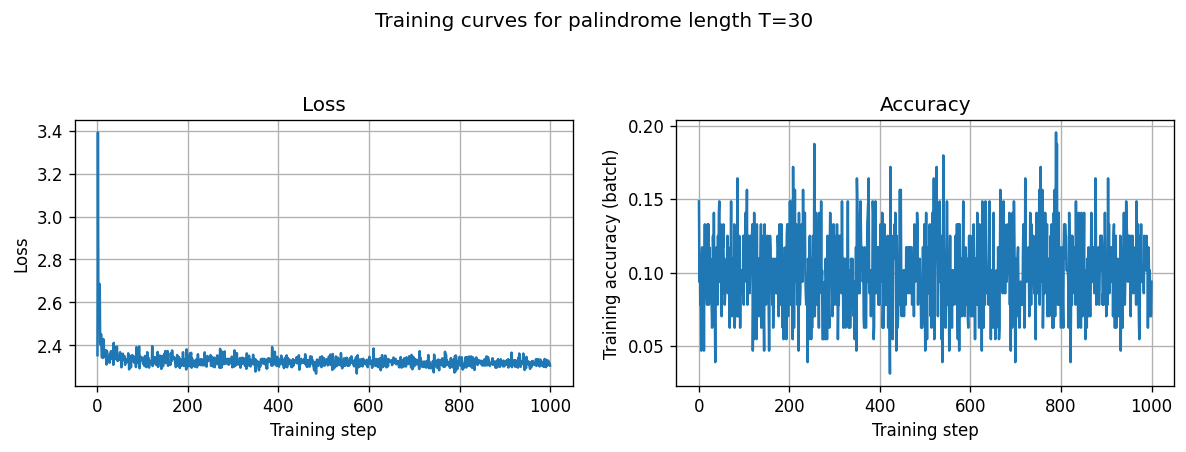

In [ ]:
import types
import torch
import matplotlib.pyplot as plt

from train import train
from dataset import PalindromeDataset
from torch.utils.data import DataLoader


def evaluate(model, input_length, num_batches=100, batch_size=128):
    device = next(model.parameters()).device
    model.eval()

    dataset = PalindromeDataset(input_length + 1)
    data_loader = DataLoader(dataset, batch_size=batch_size, num_workers=1)

    correct = 0
    total = 0

    with torch.no_grad():
        for i, (batch_inputs, batch_targets) in enumerate(data_loader):
            if i >= num_batches:
                break

            batch_inputs = batch_inputs.float().to(device).unsqueeze(-1)
            batch_targets = batch_targets.long().to(device)

            logits = model(batch_inputs)
            preds = torch.argmax(logits, dim=1)

            correct += (preds == batch_targets).float().sum().item()
            total += batch_targets.size(0)

    return correct / total


def run_experiment(T, train_steps=2000):
    config = types.SimpleNamespace(
        input_length=T - 1,
        input_dim=1,
        num_classes=10,
        num_hidden=128,
        batch_size=128,
        learning_rate=0.001,
        train_steps=train_steps,
        max_norm=10.0,
    )

    #train() is assumed to return (model, history) when return_history=True
    model, history = train(config, return_history=True)

    #evaluate final test accuracy
    acc = evaluate(model, input_length=config.input_length)
    return acc, history


lengths = [5, 10, 15, 20, 25, 30]
accuracies = []
histories = {}  #store history per T

for T in lengths:
    print(f"\nTraining for palindrome length T={T}")
    acc, history = run_experiment(T, train_steps=1000)  
    accuracies.append(acc)
    histories[T] = history
    print(f"Final evaluation accuracy for T={T}: {acc:.3f}")

plt.figure(figsize=(5, 4), dpi=200)
plt.plot(lengths, accuracies, marker="o")
plt.xlabel("Palindrome length T")
plt.ylabel("Final evaluation accuracy")
plt.title("RNN accuracy vs palindrome length")
plt.grid(True)
plt.tight_layout()
plt.show()

for T in lengths:
    h = histories[T]
    steps = h["step"]
    loss_vals = h["loss"]
    acc_vals = h["accuracy"]

    plt.figure(figsize=(10, 4), dpi=120)
    plt.suptitle(f"Training curves for palindrome length T={T}")

    plt.subplot(1, 2, 1)
    plt.plot(steps, loss_vals)
    plt.xlabel("Training step")
    plt.ylabel("Loss")
    plt.title("Loss")
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(steps, acc_vals)
    plt.xlabel("Training step")
    plt.ylabel("Training accuracy (batch)")
    plt.title("Accuracy")
    plt.grid(True)

    plt.tight_layout(rect=[0, 0.05, 1, 0.92])  
    plt.show()
